In [37]:
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv('reviews.csv')
data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [39]:
data.shape

(10000, 8)

In [40]:
data['Review'] = data['Review'].str.lower()
data["Review"] = data["Review"].replace(r'[^a-z0-9\s]', '', regex=True)

In [41]:
data.dtypes

Restaurant     object
Reviewer       object
Review         object
Rating         object
Metadata       object
Time           object
Pictures        int64
7514          float64
dtype: object

In [42]:
data['Rating'].value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [43]:
data = data.replace(to_replace='Like', value = np.nan)
data.isna().sum()

Restaurant       0
Reviewer        38
Review          45
Rating          39
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

In [44]:
df = data[['Review', 'Rating']]
df = df.dropna()
df.shape

(9954, 2)

In [45]:
df['Rating'] = df['Rating'].astype(str).astype(float)
df['sentiment'] = df['Rating'].apply(lambda x:1 if x>3 else 0)
df.shape

(9954, 3)

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout

In [47]:
max_features = 5000
max_length = 200

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(df['Review'])
X = pad_sequences(tokenizer.texts_to_sequences(df['Review']), maxlen= max_length)
y = df['sentiment'].values

In [48]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=16, input_length=max_length, input_shape=(max_length,)))
model.add(SimpleRNN(64, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.summary()

/Users/bhagya/Desktop/code/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/Users/bhagya/Desktop/code/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 16)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,249 (333.00 KB)

 Trainable params: 85,249 (333.00 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X_train, y_train, epochs=5, batch_size = 64, validation_split=0.2)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5984 - loss: 0.6724 - val_accuracy: 0.6541 - val_loss: 0.6262
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7394 - loss: 0.5354 - val_accuracy: 0.7627 - val_loss: 0.5071
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8485 - loss: 0.3634 - val_accuracy: 0.8223 - val_loss: 0.4147
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8992 - loss: 0.2629 - val_accuracy: 0.8858 - val_loss: 0.3115
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9121 - loss: 0.2309 - val_accuracy: 0.8876 - val_loss: 0.3186


In [51]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8754 - loss: 0.3531


[0.35305488109588623, 0.875439465045929]

In [52]:
import re
def predict_sentiment(review_text):
    text = review_text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length)
    prediction = model.predict(padded)[0][0]
    return f"{'pos' if prediction >= 0.5 else 'neg'} (probablity: {prediction:.2f})"
    
sample_review = "The food was great."
print(f"review: {sample_review}")
print(f"sentiment: {predict_sentiment(sample_review)}")

review: The food was great.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
sentiment: pos (probablity: 0.70)


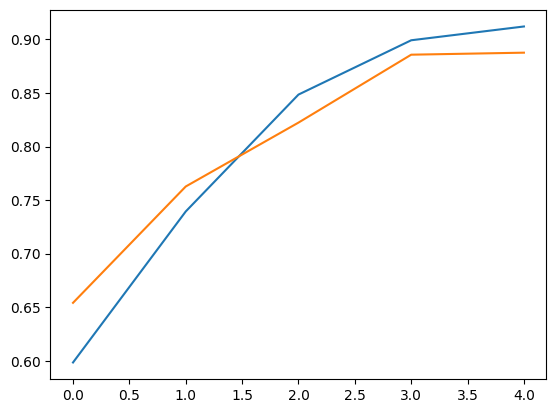

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

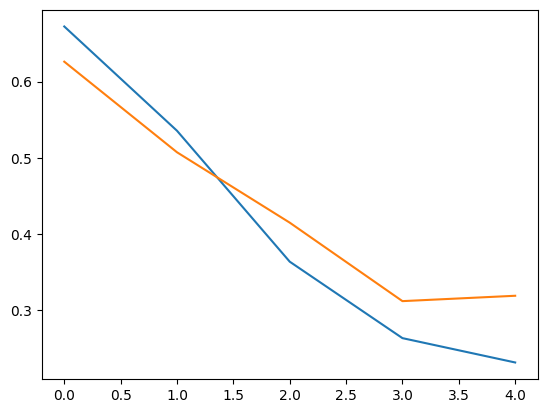

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])